Multiclass classification of handwritten digits using a multiclass softmax function and normalized gradient descent. The algorithm was trained using a preprocesed subset of 10,000 images from the MNIST handwritten digit dataset. Achieved an accuracy rate of approximately 97% 

In [43]:
import autograd.numpy as np   
import basic_gradient_descent
import matplotlib.pyplot as plt

%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

In [44]:
csvname = 'mnist_test_contrast_normalized.csv'
data = np.loadtxt(csvname,delimiter = ',')

x = data[:,:-1].T
y = data[:,-1:]

bgd = basic_gradient_descent.Setup(x,y)

In [45]:
g = bgd.multiclass_softmax; w = 0.1*np.random.randn(x.shape[0] + 1,10); max_its = 300; alpha_choice = 0.5
weight_history,cost_history, xn = bgd.normalized_gradient_descent(g,alpha_choice,max_its,w)
count_history = [bgd.multiclass_counting_cost(v) for v in weight_history]

In [46]:
print('number of misclassifications:', count_history[len(count_history)-1], '/',x[0].shape[0])
print('accuracy: ', (100*(1 - count_history[len(count_history)-1]/x[0].shape[0])), '%')

number of misclassifications: 327.0 / 10000
accuracy:  96.73 %


<IPython.core.display.Javascript object>


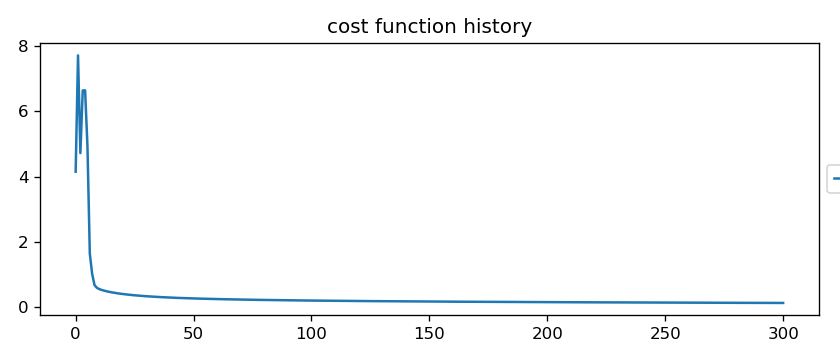

<IPython.core.display.Javascript object>


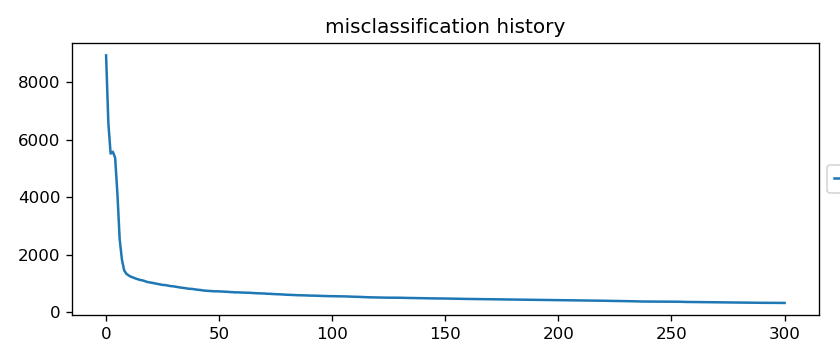

In [47]:
    vals = np.linspace(0,max_its,len(cost_history))
    fig = plt.figure(figsize = (7,3))
    plt.plot(vals,cost_history)
    plt.legend(['a = 0.5'],loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('cost function history')
    plt.show()
    
    fig = plt.figure(figsize = (7,3))
    plt.plot(vals,count_history)
    plt.legend(['a = 0.5'],loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('misclassification history')
    plt.show()